<a href="https://colab.research.google.com/github/Wacu/Predicting-Forms-of-GBV/blob/main/EMutahi_GBV_DataCleaning_EDA_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Application of GIS and Machine learning in GBV surveillance
Gender Based Violence refers to harmful acts that are directed to an individual based on their sex orientation.
Procedure
- Data Cleaning
- Descriptives
- EDA
- Sentiment Analysis
- Basic Topic Modelling

### Import Libraries

In [1]:
%%capture
!pip install transformers
!pip install git+https://github.com/nexxt-intelligence/DeepMoji@tf-keras
!pip install wordcloud matplotlib
!pip3 install sweetviz
!pip install emojis

In [3]:
# data visualisation and manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
import seaborn as sns  
sns.set(style='whitegrid',color_codes=True)
plt.style.use('fivethirtyeight')
from matplotlib import style
import seaborn as sns

import re
import nltk          #for removing stopwords
import string
from string import punctuation
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download("punkt")
nltk.download("wordnet")
#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))
from wordcloud import WordCloud,STOPWORDS

from sklearn import linear_model
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Loading the Dataset
From manually coded zindi data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Wacu/Predicting-Forms-of-GBV/main/Train.csv',encoding='latin',engine='python')
df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [5]:
df['tweet'].head(30)

0     Had a dream i got raped last night. By a guy i...
1     he thought the word raped means sex and told m...
2     She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...
3     I was sexually abused for 3 years at age 4 to ...
4     Chessy Prout can do better by telling the trut...
5     Yes men rape women. But women also rape men, y...
6     My Husband Beats Me Frequently, Wife Tells Cou...
7     Pretty sure he raped a 16yr old girl with 2 fr...
8     TW sorry to hear that  and yeah he recently th...
9     "I understand that... My father was abusive as...
10    but i would be here all night if i tried to te...
11    BABY! Soon, all the notes in case ya'll suck y...
12    He orally raped me. This is not hearsay. Multi...
13    When i was off both jobs drive to another coun...
14    This is such a ridiculous thing to say. A viol...
15    I'm reading psalm 51 and it dawns on me. David...
16    Females who support trump are so goofy to me  ...
17    you are DISGUSTING if you STILL support tr

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39650 entries, 0 to 39649
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet_ID  39650 non-null  object
 1   tweet     39650 non-null  object
 2   type      39650 non-null  object
dtypes: object(3)
memory usage: 929.4+ KB


In [8]:
df = df.iloc[:, 1:]
df.head(2)

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence


In [9]:
df.describe().T

,count,unique,top,freq
tweet,39650,39642,my run up today: - havent eaten in 30 hours -...,3
type,39650,5,sexual_violence,32648


###General Descriptive Summary

In [10]:
count = df['tweet'].str.split().str.len()
count.index =count.index.astype(str)+ ' words:'
count.sort_index(inplace=True)

In [11]:
print('Total number of words:', count.sum(), 'words')

Total number of words: 1542005 words


In [12]:
print('Mean number of words per tweet:',round(count.mean(),2), 'words')

Mean number of words per tweet: 38.89 words


In [ ]:
for ty in df['type']:
  #print('Mean number of words per tweet:',round(count.mean(),2), 'words')

In [17]:
df['tweet_length'] =df['tweet'].str.len()
print('Total length of the dataset:',df['tweet_length'].sum(), 'words')

Total length of the dataset: 8008737 words


In [18]:
print('Mean length of a tweet is:',round(df.tweet_length.mean(),0), 'characters')
df = df.drop('tweet_length',axis=1)

Mean length of a tweet is: 202.0 characters


###Hashtag Plot

In [19]:
# NORMALIZATION - converts all tweets into lowercase
df['tidy_tweet'] = df['tweet'].str.lower().apply(str)

In [20]:
#get all hashtags
df['hashtags'] = df['tidy_tweet'].apply(lambda twt : re.findall(r"#(\w+)", twt))
#None found

# Data Cleaning

##Drop N/A and remove duplicates

In [27]:
df.dropna(inplace=True)
df.isna().sum()

tweet         0
type          0
tidy_tweet    0
hashtags      0
dtype: int64

In [ ]:
#df.drop_duplicates(inplace=True)
#df.duplicated().sum()

## Text Preprocessing

In [28]:
tweet = df['tweet']
tweet[6] 

'My Husband Beats Me Frequently, Wife Tells Court |  '

In [29]:
tweets = []
for sent in tweet:
  sent = re.sub('@[\w]+','',str(sent))
  tweets.append(sent)

In [30]:
tweets[:6]

['Had a dream i got raped last night. By a guy i work with. Actually a guy i smoked with once at my house but he was doing too much tryna be sexual and it wasnâ\x80\x99t even like that for me just wanted to smoke.',
 'he thought the word raped means sex and told me â\x80\x9ci saw our dogs raping eachotherâ\x80\x9d and i was like wtf',
 'She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 MOLESTED HE IN JAIL ON NOTHER CHARGE SO SHE NOT SAYING WORD',
 'I was sexually abused for 3 years at age 4 to 7. No one believed me.  I was raped by my broâ\x80\x99s friend in a classroom at 13. He was 18. I told no one cause â\x80\x9cWho would believe me?â\x80\x9d.  My bro found out when I was 19. His friend bragged to the wrong person.  It is hard to come forward.',
 'Chessy Prout can do better by telling the truth. By not selling Owen Labrie out to hide whoever else\'s DNA was in her underwear. She said "I have never said he raped me". That changed Chessy to "I was raped, I was violated". White Female Priv

In [31]:
df.columns

Index(['tweet', 'type', 'tidy_tweet', 'hashtags'], dtype='object')

In [ ]:
df['new_tweets'] = tweets
# rearrange the order of the columns.
df = df[['date', 'time', 'username', 'tweet', 'new_tweets', 'replies_count', 'retweets_count','likes_count']]
df.head(2)

In [37]:
#data = df.rename(columns = {'replies_count':'replies',
                            'retweets_count':'retweets', 'likes_count':'likes'}, inplace=False)

df.columns

Index(['tweet', 'type', 'tidy_tweet', 'hashtags', 'text_list'], dtype='object')

In [40]:
SPECIAL_TOKENS = {
    'quoted': 'quoted_item',
    'non-ascii': 'non_ascii_word',
    'undefined': 'something'
}

def cleaning(text, stem_words=True):    
    def pad_str(s):
        return ' '+s+' '
    
    if pd.isnull(text):
        return ''

    stops = set(stopwords.words("english"))
    # Clean the text, with the option to stem words.
    
    # Empty question
    
    if type(text) != str or text=='':
        return ''

    # Clean the text
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub("[%s]" % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub("\w*\d\w*", "", text)


    text = re.sub("\'s", " ", text) 
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE)
    text = re.sub("\'ve", " have ", text)
    text = re.sub("can't", "can not", text)
    text = re.sub("n't", " not ", text)
    text = re.sub("i'm", "i am", text, flags=re.IGNORECASE)
    text = re.sub("\'re", " are ", text)
    text = re.sub("\'d", " would ", text)
    text = re.sub("\'ll", " will ", text)
    text = re.sub("e\.g\.", " eg ", text, flags=re.IGNORECASE)
    text = re.sub("(\d+)(kK)", " \g<1>000 ", text)
    text = re.sub("e-mail", " email ", text, flags=re.IGNORECASE)
    text = re.sub("\(s\)", " ", text, flags=re.IGNORECASE)
    text = re.sub("[c-fC-F]\:\/", " disk ", text)
    
    # remove comma between numbers, i.e. 15,000 -> 15000
    
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)
    
    ## all numbers should separate from words, this is too aggressive
    
    def pad_number(pattern):
        matched_string = pattern.group(0)
        return pad_str(matched_string)
    text = re.sub('[0-9]+', pad_number, text)
    
    # add padding to punctuations and special chars, we still need them later
    
    text = re.sub('\$', " dollar ", text)
    text = re.sub('\%', " percent ", text)
    text = re.sub('\&', " and ", text)
    text = re.sub('amp', "", text)
    
    def pad_pattern(pattern):
       matched_string = pattern.group(0)
       return pad_str(matched_string)
    text = re.sub('[\!\?\@\^\+\*\/\,\~\|\`\=\:\;\.\#\\\]', pad_pattern, text) 
        
    text = re.sub('[^\x00-\x7F]+', pad_str(SPECIAL_TOKENS['non-ascii']), text) # replace non-ascii word with special word
    
    
    text = [c for c in text if c not in string.punctuation]
    text = [c for c in text if c != '\n'] # Removing newline
    text = ''.join(text)
    text = text.split('https')[0] # Remove links
    
    # replace the float numbers with a random number, it will be parsed as number afterward, and also been replaced with word "number"
    
    text = re.sub('[0-9]+\.[0-9]+', " 87 ", text)
    
    text = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(text))
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation]).lower()
       # Return a list of words
    return text

In [41]:
# Clean the tweets.
df['clean_tweets'] = df['tweet'].apply(cleaning)
df.head(5)

,tweet,type,tidy_tweet,hashtags,text_list,clean_tweets
0,Had a dream i got raped last night. By a guy i...,sexual_violence,had a dream i got raped last night. by a guy i...,[],"[had, a, dream, i, got, raped, last, night., b...",had a dream i got raped last night by a guy i ...
1,he thought the word raped means sex and told m...,sexual_violence,he thought the word raped means sex and told m...,[],"[he, thought, the, word, raped, means, sex, an...",he thought the word raped means sex and told m...
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence,she not talking to me i was raped by 2 men 1 m...,[],"[she, not, talking, to, me, i, was, raped, by,...",she not talking to me i was raped by men mol...
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence,i was sexually abused for 3 years at age 4 to ...,[],"[i, was, sexually, abused, for, 3, years, at, ...",i was sexually abused for years at age to n...
4,Chessy Prout can do better by telling the trut...,sexual_violence,chessy prout can do better by telling the trut...,[],"[chessy, prout, can, do, better, by, telling, ...",chessy prout can do better by telling the trut...


In [42]:
def nonasciiword (text):
  text = re.sub("nonasciiword","",text)

  return text

df['clean_tweets'] = df['clean_tweets'].apply(nonasciiword)
df.head(3)

,tweet,type,tidy_tweet,hashtags,text_list,clean_tweets
0,Had a dream i got raped last night. By a guy i...,sexual_violence,had a dream i got raped last night. by a guy i...,[],"[had, a, dream, i, got, raped, last, night., b...",had a dream i got raped last night by a guy i ...
1,he thought the word raped means sex and told m...,sexual_violence,he thought the word raped means sex and told m...,[],"[he, thought, the, word, raped, means, sex, an...",he thought the word raped means sex and told m...
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence,she not talking to me i was raped by 2 men 1 m...,[],"[she, not, talking, to, me, i, was, raped, by,...",she not talking to me i was raped by men mol...


In [43]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['tweets_without_stopwords'] = df['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head(3)

,tweet,type,tidy_tweet,hashtags,text_list,clean_tweets,tweets_without_stopwords
0,Had a dream i got raped last night. By a guy i...,sexual_violence,had a dream i got raped last night. by a guy i...,[],"[had, a, dream, i, got, raped, last, night., b...",had a dream i got raped last night by a guy i ...,dream got raped last night guy work actually g...
1,he thought the word raped means sex and told m...,sexual_violence,he thought the word raped means sex and told m...,[],"[he, thought, the, word, raped, means, sex, an...",he thought the word raped means sex and told m...,thought word raped means sex told saw dogs rap...
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence,she not talking to me i was raped by 2 men 1 m...,[],"[she, not, talking, to, me, i, was, raped, by,...",she not talking to me i was raped by men mol...,talking raped men molested jail nother charge ...


# EDA -Exploratory Data Analysis

#### Word Cloud

In [32]:
# Create a word cloud
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (12, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    
    plt.show()

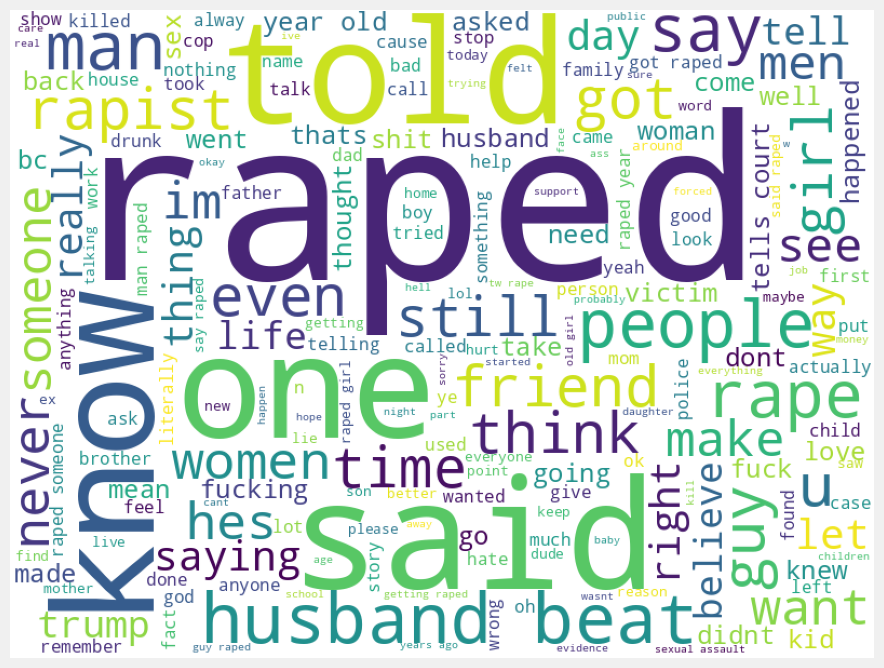

In [44]:
# display the word cloud.
cloud(' '.join(df['tweets_without_stopwords']))

In [46]:
# Get Word Value Counts.
from collections import Counter
df['text_lists'] = df['tweets_without_stopwords'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['text_lists'] for item in sublist]) # Counts the frequency of words.
temp = pd.DataFrame(top.most_common(20)) # DataFrame of top 20
temp.columns = ["common_words", "count"]
temp.style.background_gradient(cmap="Blues")

,common_words,count
0,raped,33810
1,husband,6510
2,like,6348
3,beats,5938
4,said,5372
5,told,4713
6,get,4467
7,rape,4273
8,man,4213
9,one,4091


In [ ]:
#data.to_csv("GBV_data_clean_v01.csv")

In [ ]:
#saving the data
#from google.colab import files
#files.download('GBV_data_clean_v01.csv')
data.columns

Index(['username', 'new_tweets', 'clean_tweets', 'tweets_without_stopwords',
       'replies', 'retweets', 'likes'],
      dtype='object')

# Sentiment Analysis

## Using NLTK- Natural Language Tool Kit

NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

Since VADER is pretrained, you can get results more quickly than with many other analyzers. However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. It’s less accurate when rating longer, structured sentences, but it’s often a good launching point.

In [47]:
import nltk

nltk.download([
"names",
 "stopwords",
 "state_union",
 "twitter_samples",
"movie_reviews",
 "averaged_perceptron_tagger",
 "vader_lexicon",
"punkt","vader"
 ])

[nltk_data] Package 'vader' not found in index


False

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really crazy!")
#{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.275, 'neu': 0.307, 'pos': 0.418, 'compound': 0.3397}

In [50]:
pol=[]
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
for  tw in df['tweets_without_stopwords']:
  result=sia.polarity_scores(tw)
  pol.append(result)
df['pol_nltk']=pol

In [51]:
nlt=[]
for k in df['pol_nltk']:
  k.pop("compound",None)
  inverse = [(value, key) for key, value in k.items()]
  n=max(inverse)[1]
  nlt.append(n)
df['nltk_sentiment']=nlt

In [52]:
#df.sample(50)
df['nltk_sentiment'].value_counts()

neu    27381
neg    10880
pos     1389
Name: nltk_sentiment, dtype: int64

<Axes: xlabel='nltk_sentiment', ylabel='count'>

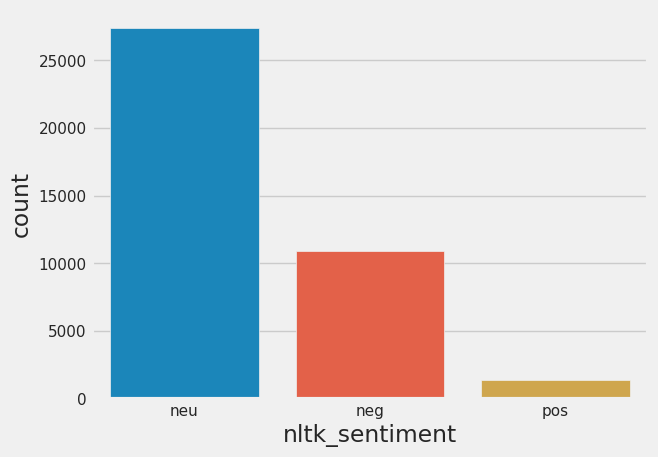

In [53]:
sns.countplot(x='nltk_sentiment',data=df)

From the above chart, we can see that VADER was able to recognize the sentiment of the tweets. The most tweets are Neutral whereas the least, as expected are positive.
I expected to have more Negative tweets. However, challenges such as the words used in the tweet,long tweets,presence of subjectivity renders the sentiment neutral.

# Topic Modelling

In [54]:
data2 = pd.DataFrame(df['tweets_without_stopwords'])
data2.head()

,tweets_without_stopwords
0,dream got raped last night guy work actually g...
1,thought word raped means sex told saw dogs rap...
2,talking raped men molested jail nother charge ...
3,sexually abused years age one believed raped b...
4,chessy prout better telling truth selling owen...


In [55]:
data2.isna().sum()

tweets_without_stopwords    0
dtype: int64

In [56]:
data2['tweets_without_stopwords'][0]

'dream got raped last night guy work actually guy smoked house much tryna sexual even like wanted smoke'

**Some important points **bold text**:-

1) LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.

2) max_features depends on your computing power and also on eval. metric (coherence score is a metric for topic model). Try the value that gives best eval. metric and doesn't limits processing power.

3) Default values for min_df & max_df worked well.

4) Can try different values for ngram_range.

In [59]:
vect =TfidfVectorizer(max_features=1000)

In [60]:
vect_text=vect.fit_transform(data2['tweets_without_stopwords'])

We are now able to see the most frequent words in the corpus based on thr idf score. The lesser the value, the more common the word.

In [61]:
print(vect_text.shape)
print(vect_text)

(39650, 1000)
  (0, 942)	0.2599493170647493
  (0, 502)	0.1657036756768898
  (0, 276)	0.2052466865776322
  (0, 759)	0.2648865936542073
  (0, 578)	0.2545099914166595
  (0, 423)	0.26746673633494183
  (0, 17)	0.26727842459178835
  (0, 972)	0.28753464697201575
  (0, 379)	0.41966908734697883
  (0, 601)	0.26224864930974934
  (0, 480)	0.27239412154868226
  (0, 691)	0.06809040198512335
  (0, 369)	0.19248322364038595
  (0, 252)	0.3761232055039231
  (1, 984)	0.4016527288036745
  (1, 693)	0.36783489486505544
  (1, 733)	0.3533036263243808
  (1, 879)	0.21933880459805033
  (1, 758)	0.27227936074139575
  (1, 546)	0.4004070067046001
  (1, 970)	0.3942786855572909
  (1, 867)	0.3069977557951592
  (1, 502)	0.19897153433026443
  (1, 691)	0.08176071955435797
  (2, 735)	0.3246021529368179
  :	:
  (39647, 962)	0.45519177264281835
  (39647, 77)	0.32273994608327056
  (39647, 429)	0.3158547112775748
  (39648, 408)	0.28463134646360533
  (39648, 610)	0.5863232543140707
  (39648, 655)	0.42258409568203564
  (39648, 3

In [64]:
idf=vect.idf_

In [70]:
dd=dict(zip(vect.get_feature_names_out(idf),idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(f"Word with highest score: {l[0]}\nWord with lowest score: {l[-1]}\n")
print(f"woman score: {dd['woman']}")
print(f"violence score: {dd['violence']}")

Word with highest score: raped
Word with lowest score: obama

woman score: 3.6202447080921
violence score: 6.05053718040738


From the output, we can see that using the idf value, the most frequent word in the corpus is raped. Obama is the least frequent word

##Latent Dirichlet Allocation (LDA)
LDA is the most popular technique.The topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.

To understand the maths it seems as if knowledge of Dirichlet distribution (distribution of distributions) is required which is quite intricate and left fior now.

In [71]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

In [72]:
lda_top=lda_model.fit_transform(vect_text)

In [73]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(39650, 10)
[[0.02191771 0.02191627 0.02191577 ... 0.80274323 0.02191732 0.02191481]
 [0.02502583 0.02502004 0.025025   ... 0.77479404 0.02502398 0.02502015]
 [0.02845662 0.02844994 0.74383349 ... 0.02846762 0.02848819 0.02844794]
 ...
 [0.0293099  0.02930432 0.02930434 ... 0.02930959 0.02931253 0.7362166 ]
 [0.39478047 0.02755472 0.02755421 ... 0.02755165 0.02755781 0.02755127]
 [0.02307569 0.02306932 0.29440761 ... 0.10791012 0.43616653 0.02306859]]


In [74]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum) 

0.9999999999999998


Note that the values in a particular row adds to 1. This is beacuse each value denotes the % of contribution of the corressponding topic in the document

In [75]:
# composition of doc 0 for eg
print("Tweets Document: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Tweets Document: 
Topic  0 :  2.19177109795902 %
Topic  1 :  2.1916274898024826 %
Topic  2 :  2.191577195508052 %
Topic  3 :  2.1919432963558645 %
Topic  4 :  2.1925162453319254 %
Topic  5 :  2.191360682205727 %
Topic  6 :  2.1916680006813243 %
Topic  7 :  80.27432330970801 %
Topic  8 :  2.19173197843599 %
Topic  9 :  2.1914807040115996 %


As we can see Topic 7 is dominantly present in tweets corpus

In [76]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[ 0.10004372  2.36193398  0.10002581 ...  0.10037658  0.10126237
  60.732928  ]
 [ 0.10849769  0.10002876  0.10004568 ...  0.10001637  0.1000081
   1.58851473]
 [ 0.10002952  0.10002182  0.10002061 ...  0.10002415  0.10001175
   0.10001891]
 ...
 [39.00247291  0.10001086  0.10003893 ... 10.05908527  0.10002105
   0.10001809]
 [ 0.10003335 46.28975147 48.15710132 ... 28.03087454  0.10001128
   0.10002217]
 [ 0.10127993  0.10166561  0.10001096 ...  0.10002436  0.10000542
   0.10000423]]
(10, 1000)


### Most important words in each topic

In [78]:

vocab = vect.get_feature_names_out(idf)

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
raped case police cause day without oh called love job 

Topic 1: 
mother husband beats gave kill son front look happy cries 

Topic 2: 
black assault sexual molested little children death murdered public etc 

Topic 3: 
raped like man know im never said would one told 

Topic 4: 
raped told said got one friend get time guy like 

Topic 5: 
old trump raped year show proof girl justice ass evidence 

Topic 6: 
raped like talk part rape public knows people man already 

Topic 7: 
raped sex video female raping must like everyday man men 

Topic 8: 
raped like say know said kids women people real best 

Topic 9: 
beats husband court wife tells woman divorce via accused housewife 



### Word Cloud
Lets better visualize these words

In [79]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

#### Topic 1

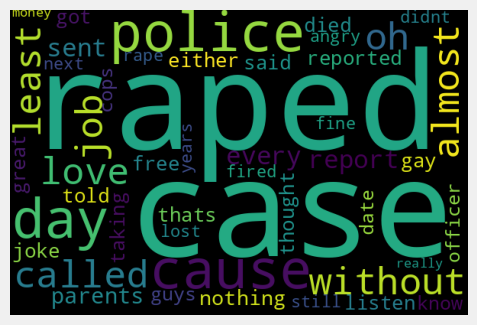

In [80]:
draw_word_cloud(0)

#### Topic 7

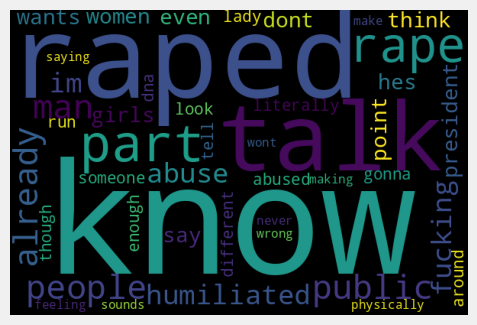

In [81]:
draw_word_cloud(6)

Modelling

In [85]:
df['type'].value_counts(normalize=True)

sexual_violence                 0.823405
Physical_violence               0.149962
emotional_violence              0.016419
economic_violence               0.005473
Harmful_Traditional_practice    0.004741
Name: type, dtype: float64

<Axes: xlabel='type', ylabel='count'>

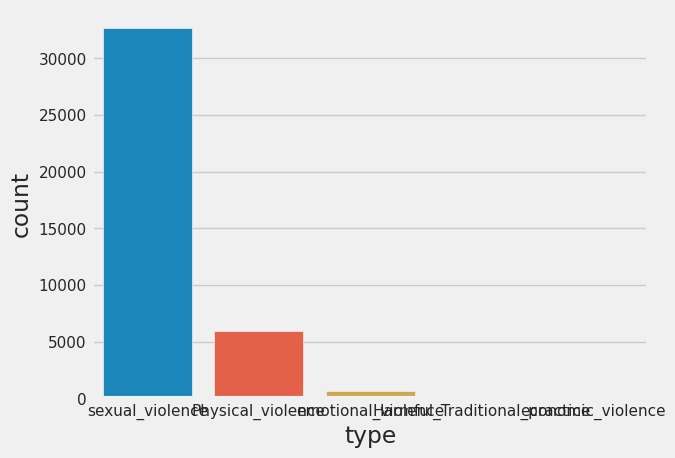

In [89]:
sns.countplot(x='type',data=df)

The data seems imbalances
Lets apply Synthetic Minority Oversampling Techniques to avoid prediction ignorance of minority classes leading to poor model performance.
Oversampling involves the duplication of minority classess despite these records not adding any value or any new information to the model.


In [92]:
#%pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import where
from collections import Counter

In [ ]:
#transforming the dataset
oversample = SMOTE()
y=oversample.fit_resample(df['type'])
counter=Counter(y)
print(counter)